In [8]:
%matplotlib inline

# Comprendre les données - Partie 2

``pandas`` est une librairie vitale pour le traitement et la compréhension des données: elle permet de charger de vastes datasets et de les manipuler très rapidement. Cependant justement, les datasets traités sont souvent extrêmement grands (plusieurs dizaines de milliers de points). 

Ainsi, observer manuellement chaque point devient impossible, et il devient essentiel de pouvoir visualiser ces données pour les comprendre. Visualiser permet de voir les rapports entre les points de données, leur évolution et surtout de voir les valeurs aberrantes (``outlier``). Au vu de l'importance de la visualisation, ``pandas`` propose directement des options pour visualiser les données, qui reposent sur la librairie ``matplotlib``.

### Note. Jupyter Magics

Pour faciliter l'exploration, Jupyter propose un ensemble de commandes appelées ``magic``. Celles-ci regroupent un ensemble de librairies et de fonction que l'on importe en une seule ligne de code. 

Pour plus de magic possibles, voir ce lien : https://ipython.readthedocs.io/en/stable/interactive/magics.html

In [1]:
import matplotlib.pyplot as plt # comme pandas, ici la manière traditionelle d'importer matplotlib

## Visualiser avec pandas

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data/iris_dataset.csv', 
                 names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Diagramme en ligne

Le diagramme en ligne relie chaque point d'une variable par une ligne, permettant d'en voir l'évolution. Il est donc adapté pour visualiser des valeurs continues.

Par défaut, la fonction ``plot()`` de ``pandas`` dessigne une ligne sur le graphique

<AxesSubplot:>

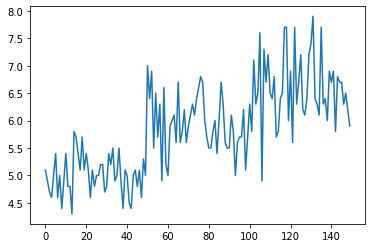

In [4]:
data = df['sepal_length']
data.plot()

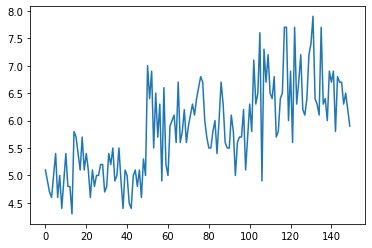

In [22]:
data = df['sepal_length']
data.plot()

Si l'on appelle la fonction ``plot()`` depuis un DataFrame, ``pandas`` modélise chaque colonne sur différentes lignes. Il ajoutera également automatiquement une légende au graphique:

<AxesSubplot:>

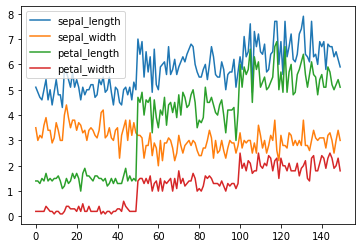

In [5]:
df.plot()

### Diagrammes à barres

Les diagrammes à barres permettent de visualiser des données catégorielles grâce à des barres. La taille de chaque barre est proportionnelle aux valeurs de la catégorie qu'elle représente. C'est donc un type de graphique idéal pour comparer différentes classes entre elles.

``pandas`` permet de modéliser les données avec des barres verticales ou horizontales:

In [6]:
partial_df = df.iloc[:10] # on ne sélectionne qu'une partie des données pour plus de clarté

<AxesSubplot:>

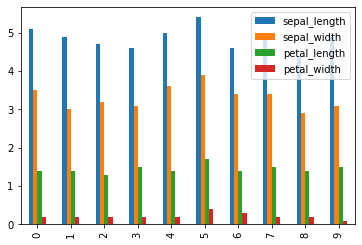

In [7]:
partial_df.plot.bar() # les barres sont verticales

<AxesSubplot:>

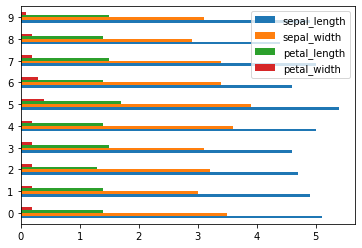

In [7]:
partial_df.plot.barh() # les barres sont horizontales

<AxesSubplot:>

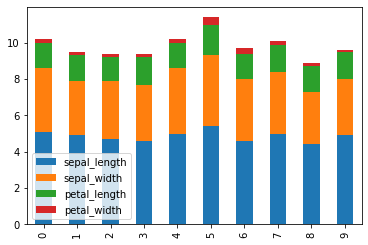

In [8]:
partial_df.plot.bar(stacked=True) # les barres sont superposées

Parfois, on aura besoin de vérifier au travers d'un graphique la distribution des valeurs dans une colonne. Pour cela on utilise la méthode ``value_counts`` d'une Serie, suivie de la fonction ``plot()`` (et suivie éventuellement du type de diagramme)

In [9]:
partial_df['sepal_length'].value_counts()

4.9    2
4.6    2
5.0    2
5.1    1
4.7    1
5.4    1
4.4    1
Name: sepal_length, dtype: int64

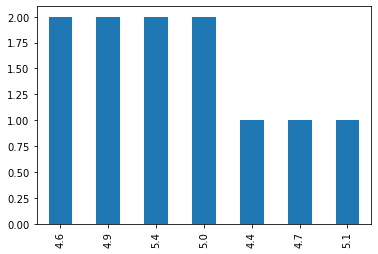

In [28]:
partial_df['sepal_length'].value_counts().plot.bar()

<AxesSubplot:>

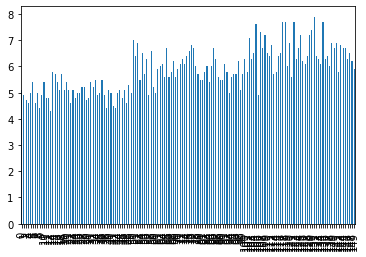

In [8]:
df['sepal_length'].plot.bar()

### Histogramme

Un histogramme est un type particulier de diagramme, se situant entre le diagramme à barre et celui à ligne : plutôt que d'afficher une barre par point de données, l'histogramme regroupe les données en un certain nombre de paquets. La taille de chaque barre est conditionnée par le nombre de point contenu dans chaque paquet. C'est donc un outil très utile pour avoir un aperçu détaillé de la distribution des données.

Ci-dessous, on peut voir qu'environ 45 points de données ont des valeurs situées entre 0 et 3 pour 'petal_width' tandis que près de 100 ont des valeurs situées entre 2.5 et 3 pour 'sepal_width':

<AxesSubplot:ylabel='Frequency'>

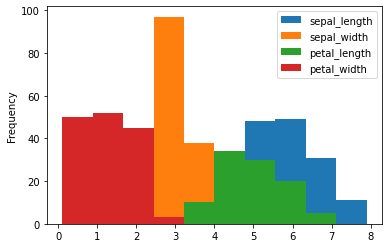

In [10]:
df.plot.hist()

### Nuage de points

Les nuages de points sont utilisés pour visualiser la relation entre deux variables (*x* et *y*). Il permet donc de voir rapidement s'il y a une corrélation forte ou faible entre ces deux variables. 

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

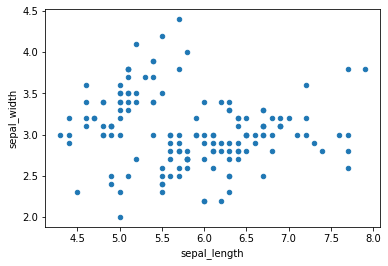

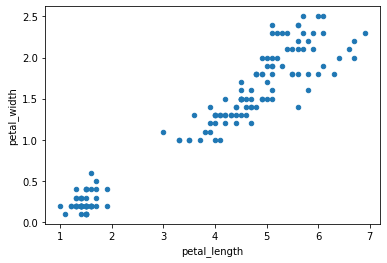

In [11]:
df.plot.scatter('sepal_length', 'sepal_width') # ici on regarde la relation entre les colonnes A et B
df.plot.scatter('petal_length', 'petal_width') # ici on regarde la relation entre les colonnes C et D

On peut dire qu'il y a une corrélation forte entre deux variables lorsque les points sur le diagrammes forment une ligne. 

En Machine-Learning, il est important de trouver les variables les plus corrélées dans le dataset. Il est donc important de visualiser la relations entre toutes les paires possibles de variables. Avec ``pandas``, c'est possible en utilisant la fonction ``scatter_matrix``

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5e98a8190>,
      dtype=object)

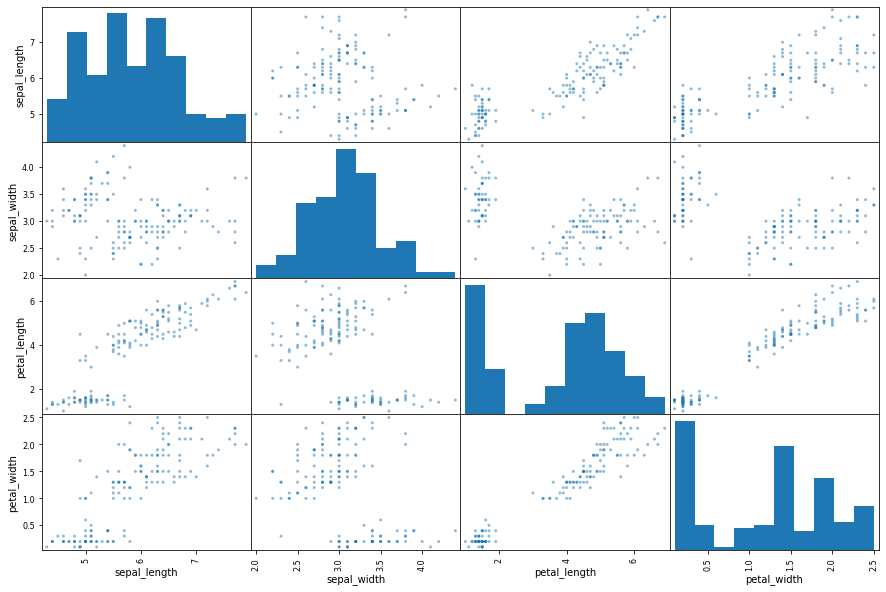

In [45]:
pd.plotting.scatter_matrix(df, figsize= (15, 10))

## Visualiser avec matplotlib

Comme expliqué plus tôt, la visualisation des données avec ``pandas`` repose sur ``matplotlib``. Si généralement ``pandas`` est suffisant pour visualiser les données d'un DataFrame dans un projet de Machine-Learning, il peut vite être utile de savoir utiliser ``matplotlib`` pour obtenir certains types de diagrammes, pour pousser plus loin la visualisation et surtout pour visualiser des données sans nécessairement passer par ``pandas``.

In [18]:
import matplotlib.pyplot as plt

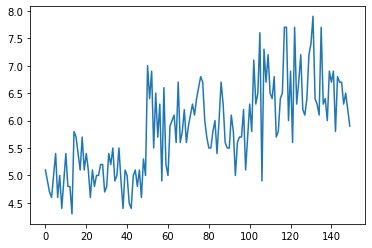

In [34]:
# simple graphique avec matplotlib
import numpy as np
# data = np.arange(10) # fausse données de 0 a 9
data = df['sepal_length']
plt.plot(data)

## Figure et Subplots

Bien que l'on puisse afficher un graphique de la manière ci-dessus, on aura souvent besoin de régler les paramètres (changer les couleurs, le types de graphiques, ...), d'afficher plusieurs graphiques ensembles, etc. 

Pour cela, on doit donc d'abord créer un objet ``Figure``, qui servira de plan pour tous les graphiques. On peut la comparer à un tableau: une Figure contiendra plusieurs graphiques par lignes et par colonne. Ces graphiques sont appelées ``Subplot``. 

Une Figure est créée de la façon ci-dessous:

In [ ]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

Une fois la figure créée, on peut y ajouter les ``Subplots``, dans lesquels les graphiques seront dessinés.

On va préciser ici les paramètres qui interviennent dans ``add_subplot()``. Le premier et second paramètre indiquent respectivement le nombre de colonnes et de lignes que contiendra l'objet ``Figure``. Le dernier paramètre indique la position du ``Subplot`` dans cette Figure. Les Subplots s'ajoutent de la partie en haut à gauche de la Figure jusqu'à la partie en bas à droite.

Par exemple, dans la commande ``ax1 = fig.add_subplot(2,2,1)``, on indique que la Figure contient 2 colonnes, 2 lignes, et que ce Subplot est en première position, soit en haut à gauche de la Figure

<BarContainer object of 150 artists>

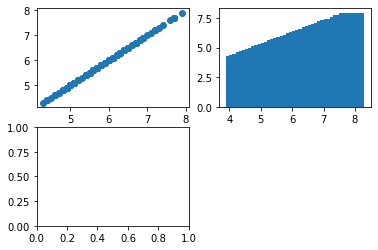

In [35]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

ax1.scatter(data, data)
ax2.bar(data, height=data)

### Note:

Lorsque vous utilisez matplotlib dans Jupyter, il est important de crééer la Figure et les Subplots dans la même cellules, pour que les graphiques s'affichent.

Puisque l'on aura souvent besoin d'afficher plusieurs graphiques ensembles, il est possible de créer une Figure et ses différents Subplots avec la commande ``subplots()``.

De cette façon, on peut accéder aux différents Subplots par leurs index, comme pour une liste en Python. On indique d'abord la ligne puis la colonne. 

Par exemple, pour accéder au premier Subplot, on utilisera ``axes[0,0]``,et l'on utilisera ``axes[1,0]`` pour accéder au troisième Subplot.

<BarContainer object of 150 artists>

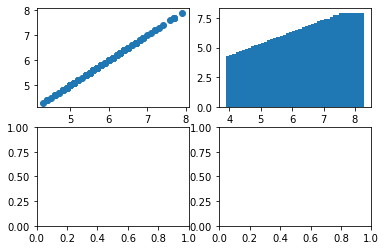

In [36]:
fig, axes = plt.subplots(2,2)
axes[0,0].scatter(data, data)
axes[0,1].bar(data, data)

## Couleurs

Par défaut, tous les graphiques sont affichés en bleu. Bien entendu, il est possible de modifier ce paramètre pour utiliser une ou plusieurs autres couleurs.

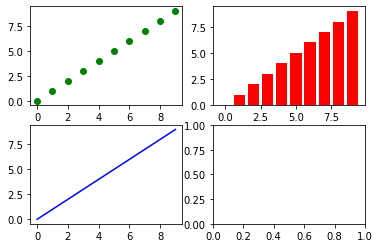

In [22]:
fig, axes = plt.subplots(2,2)
axes[0,0].scatter(data, data, color='g')
axes[0,1].bar(data, data, color='r')
axes[1,0].plot(data, c='b')

## Références

* Matplotlib:
    * https://matplotlib.org/
* pandas (visualisation):
    * https://pandas.pydata.org/docs/user_guide/visualization.html
    
* Tutoriel Kaggle pour la visualisation: https://www.kaggle.com/learn/data-visualization